# 1. Ekstraksi Fitur protein dari protein berbentuk file FASTA menjadi file CSV untuk melakukan klasifikasi

In [33]:
pip install discere


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for discere from https://files.pythonhosted.org/packages/ee/d4/90b5ec358a2925dee44f6fc9c3bb4069f0192907cd0d0f291637ce5d856b/discere-0.0.4-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [48]:
import discere.discere as di

di.extract_feature('C:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein/positif.fasta',
                   'C:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein/negatif.fasta',
                   'C:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein')

Processing fasta files....
Cleaning existing data...
Generating intermediate files...
Reading data...
Clearing existing files...
C:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein/output/
['@relation Aminacidcomposition', '@attribute A numeric', '@attribute R numeric', '@attribute N numeric', '@attribute D numeric', '@attribute C numeric', '@attribute E numeric', '@attribute Q numeric', '@attribute G numeric', '@attribute H numeric', '@attribute I numeric', '@attribute L numeric', '@attribute K numeric', '@attribute M numeric', '@attribute F numeric', '@attribute P numeric', '@attribute S numeric', '@attribute T numeric', '@attribute W numeric', '@attribute Y numeric', '@attribute V numeric', '@attribute class {serk,loc}', '@data']
Feature extraction complete...
Extracted features are saved inC:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein/ directory in .txt, .arff and .csv formats


# 2. Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 2.1. Read file csv

In [2]:
kolom = [f'fitur-{i+1}' for i in range(28)]
len(kolom)

28

In [47]:
#29287 pneumonia
#38157
print('pneumonia = ',29287)
print('tbc = ',38157-29287)

pneumonia =  29287
tbc =  8870


In [3]:
df=pd.read_csv('tain_DL.csv',header=None)
df.columns = kolom
df


,fitur-1,fitur-2,fitur-3,fitur-4,fitur-5,fitur-6,fitur-7,fitur-8,fitur-9,fitur-10,...,fitur-19,fitur-20,fitur-21,fitur-22,fitur-23,fitur-24,fitur-25,fitur-26,fitur-27,fitur-28
0,30,3,23,22,9,18,8,33,20,30,...,0,7,0.050,0.345,0.264,0.366,5.685,35450.59,48.73,1
1,29,4,21,19,11,18,6,27,21,28,...,0,11,0.069,0.320,0.279,0.379,5.925,35124.94,40.29,1
2,22,4,26,27,16,27,8,20,31,25,...,3,25,0.119,0.295,0.292,0.373,5.414,41959.52,31.36,1
3,24,10,25,35,9,30,12,29,27,47,...,0,13,0.055,0.377,0.259,0.342,5.406,45144.32,42.14,1
4,23,6,19,26,14,19,9,24,24,31,...,3,12,0.080,0.321,0.249,0.360,7.114,41293.92,36.98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38152,12,2,14,6,7,16,4,2,2,24,...,1,7,0.087,0.273,0.297,0.419,5.489,18981.48,36.47,0
38153,58,3,26,23,11,49,10,19,10,31,...,4,8,0.055,0.332,0.327,0.310,5.112,43345.67,35.80,0
38154,24,4,18,10,6,17,7,6,2,13,...,2,5,0.070,0.274,0.323,0.355,4.386,19556.32,10.35,0
38155,55,2,12,13,22,36,10,34,4,52,...,12,7,0.101,0.345,0.241,0.448,7.169,43728.09,33.92,0


# 3. EDA
## 3.1. Melihat persebaran untuk masing-masing fitur menggunakan SwarmPlot

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

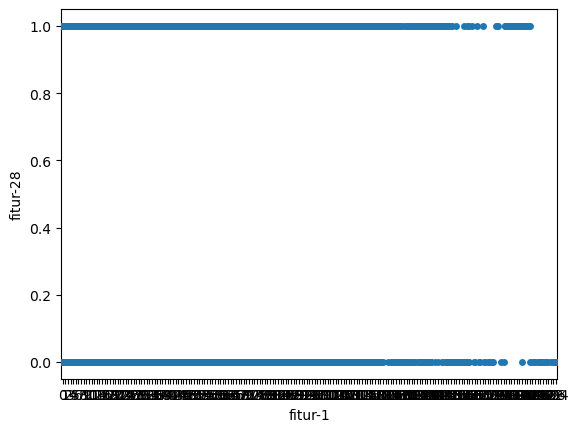

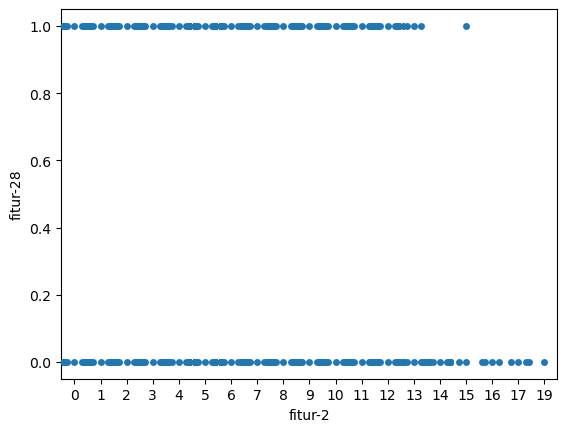

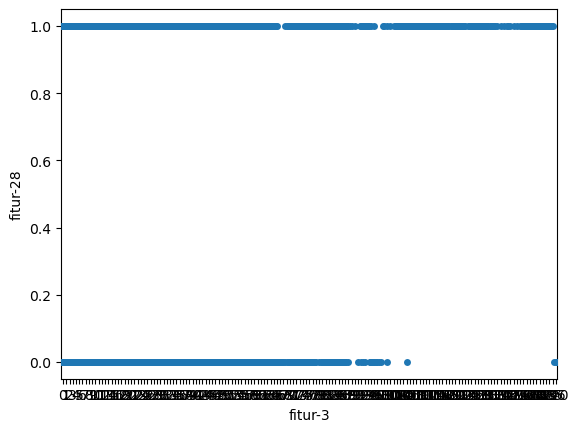

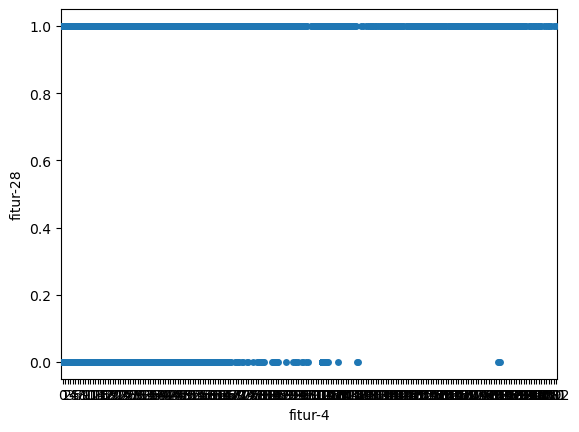

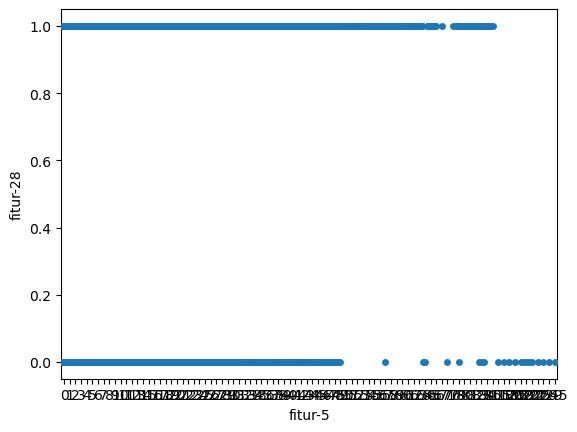

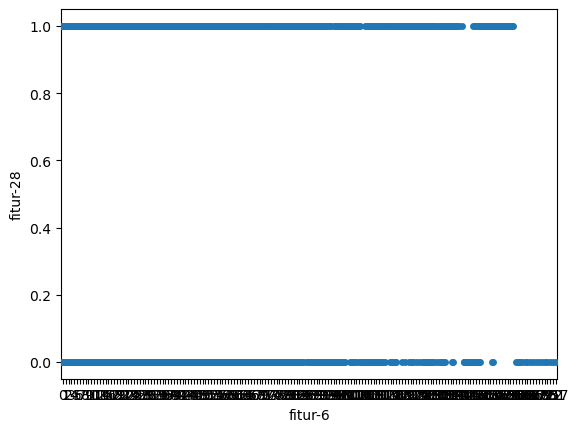

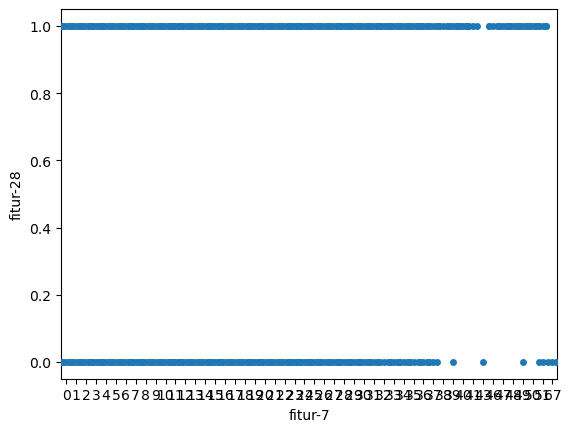

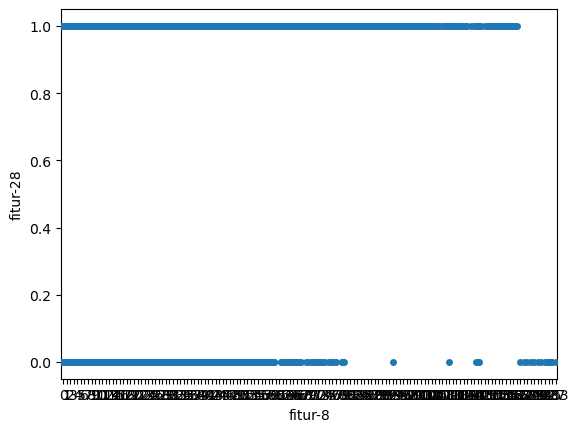

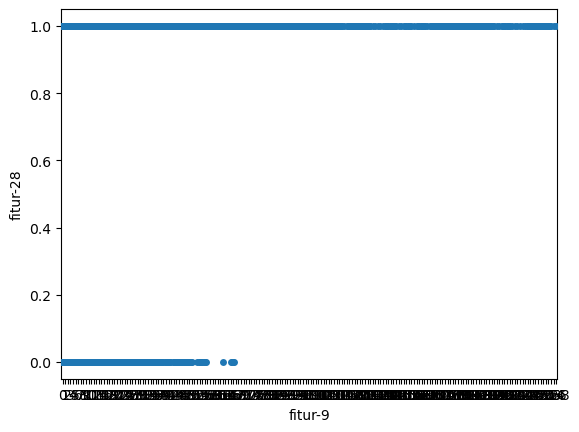

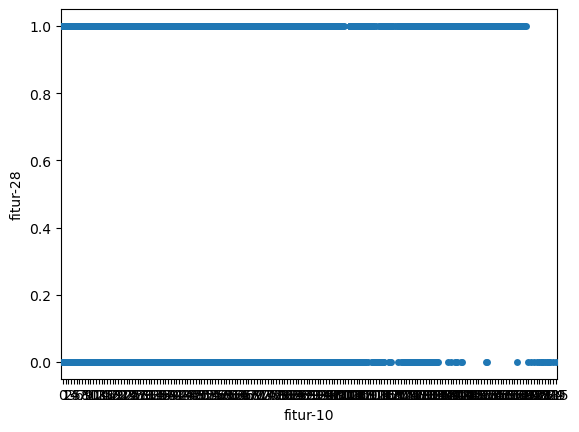

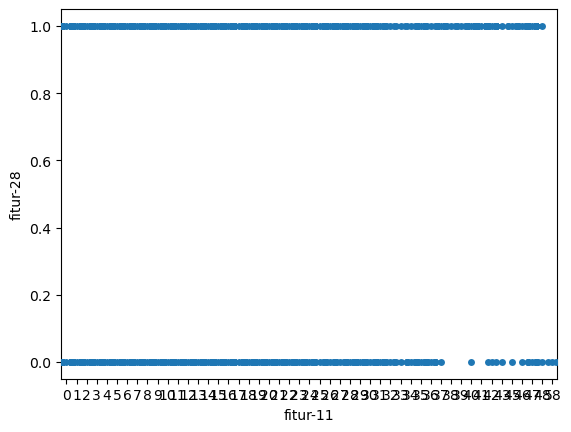

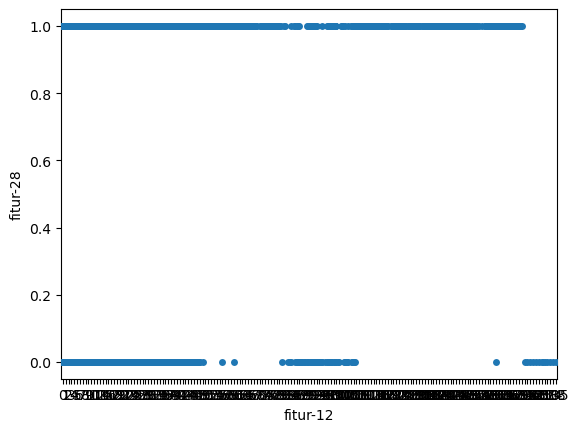

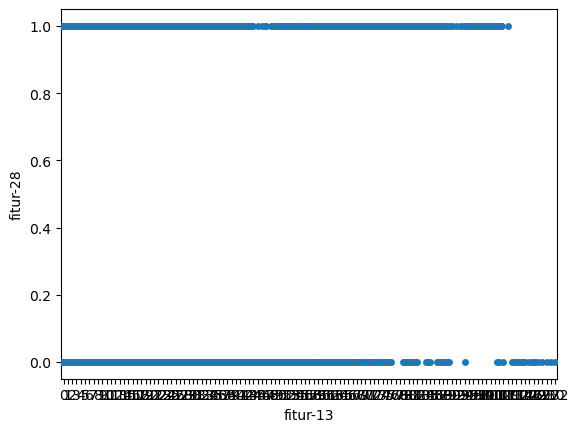

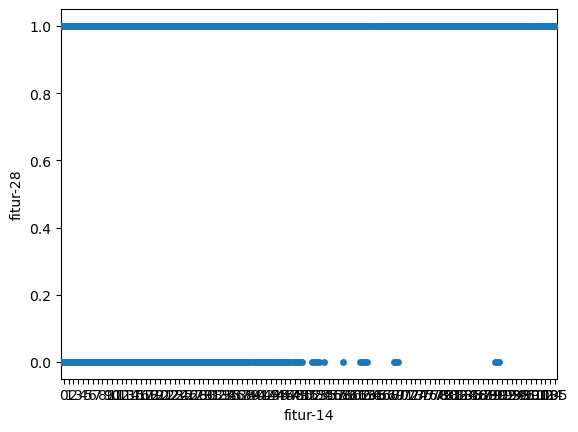

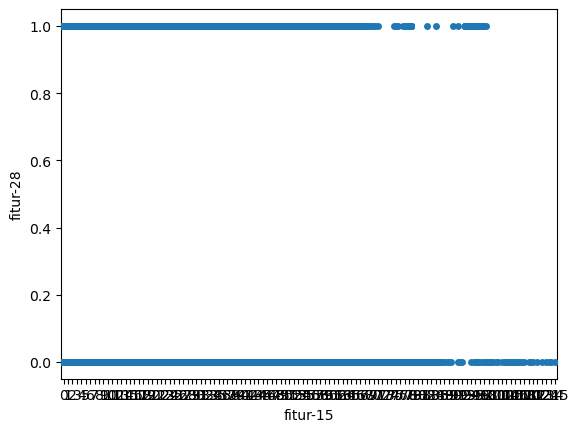

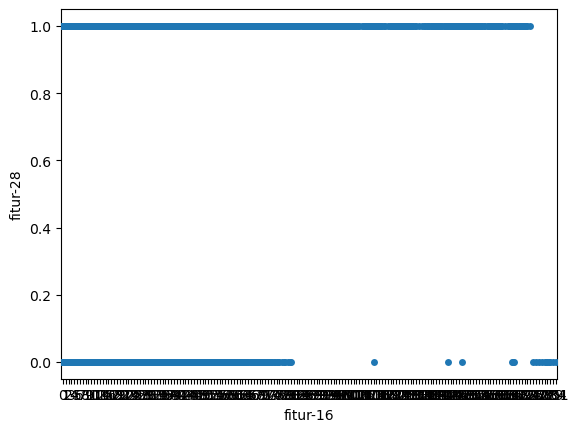

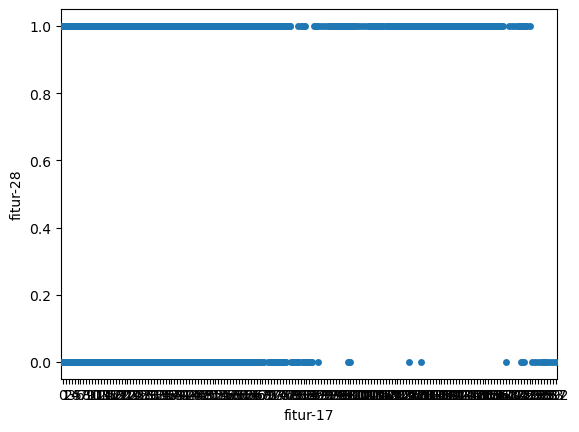

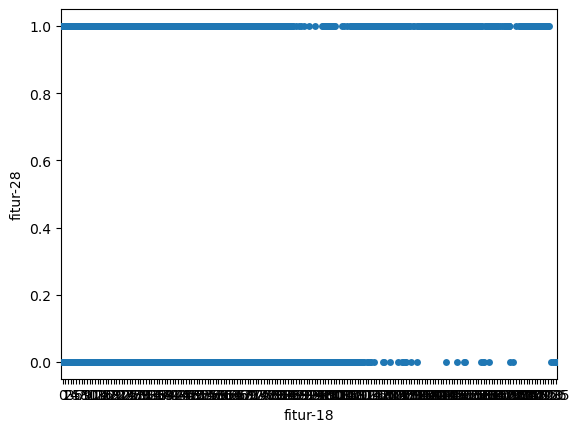

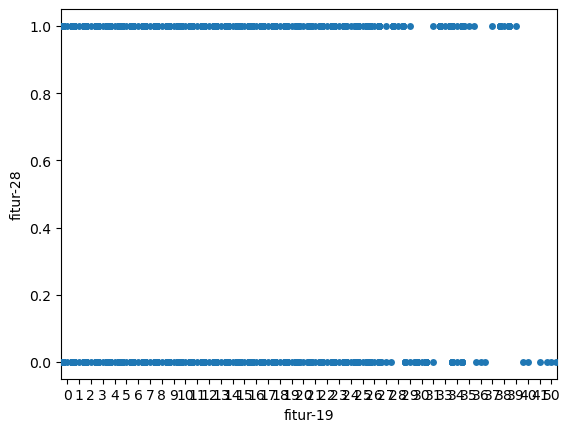

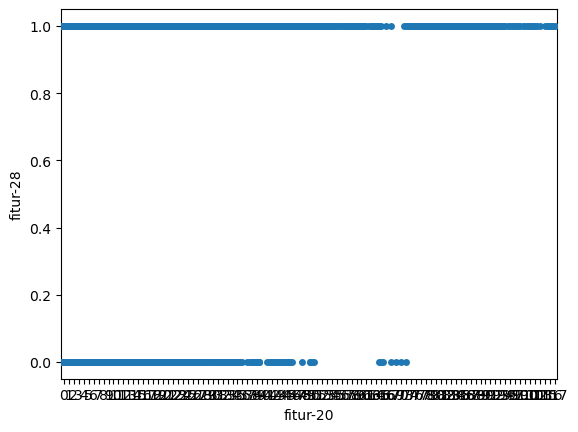

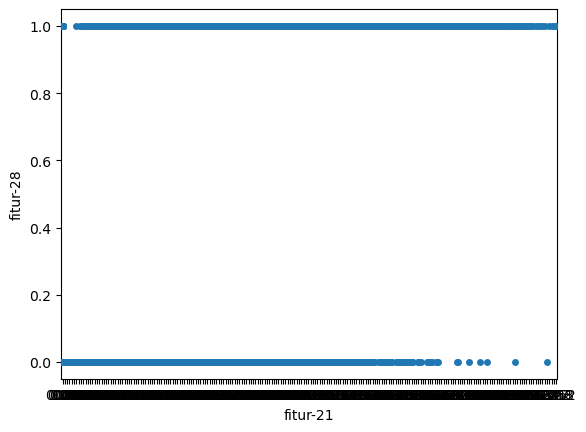

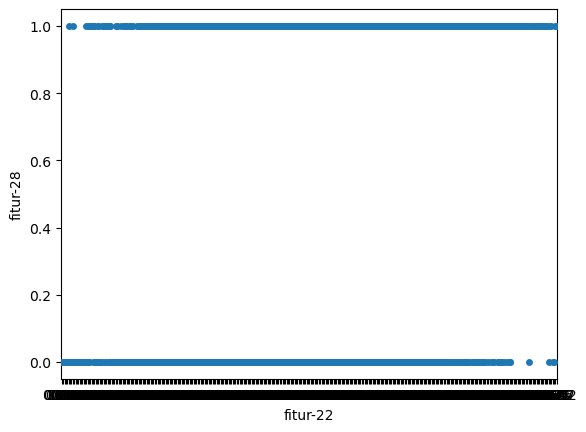

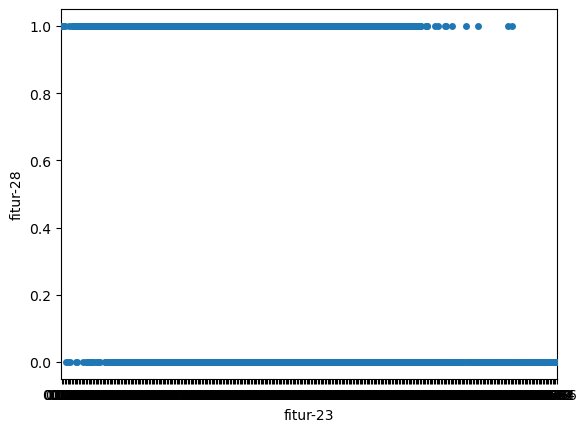

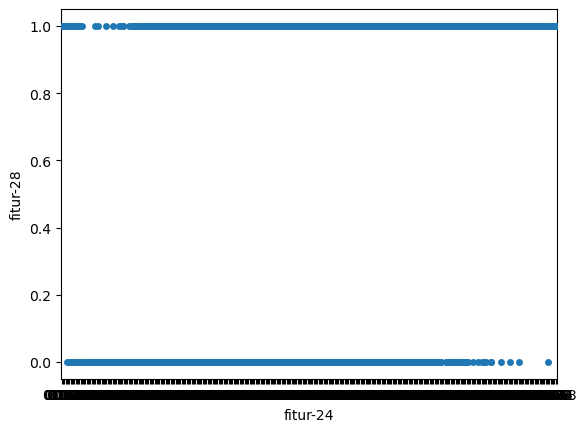

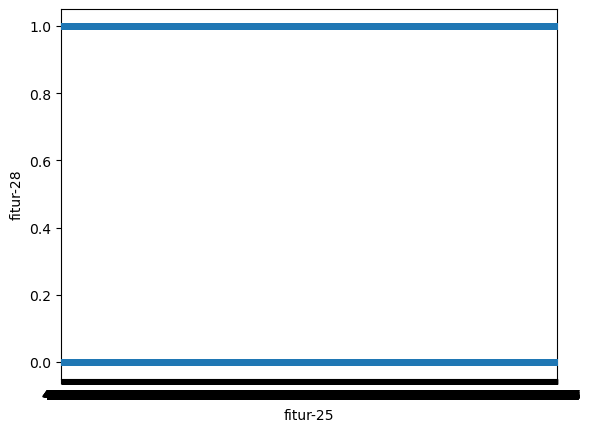

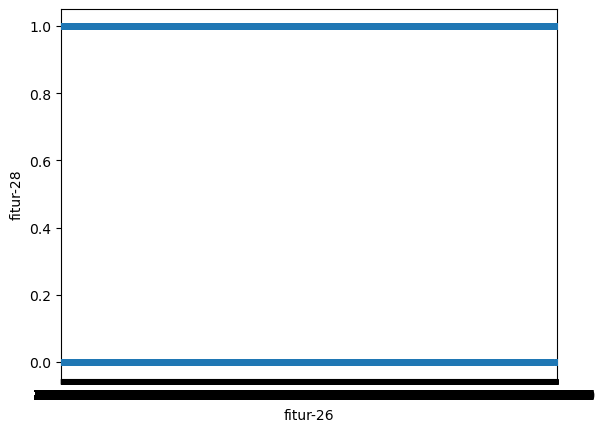

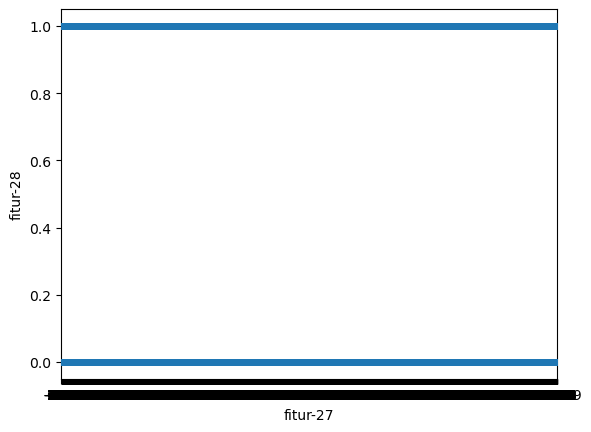

In [5]:
kolomeda =[f'fitur-{i+1}' for i in range(27)]
for i, col in enumerate(kolomeda):
    plt.figure(i)
    sns.swarmplot(data=df, x=col, y='fitur-28')

# 3.Memisahkan antara variabel bebas dan terkait

In [7]:
X=df.drop(['fitur-28'],axis=1)
y=df['fitur-28']

# 4. Eksperimen dan hasil

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
standard.set_output(transform='pandas')

StandardScaler()

## 4.1. Train:Test = 80:20 dan Membuat model SVM

### Splitting

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Standarisasi

In [9]:
x_train=standard.fit_transform(x_train)
x_test=standard.transform(x_test)

In [10]:
x_train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26
31777,-0.678469,-0.029374,-0.587416,-0.876414,-0.494838,-0.807647,-0.891193,-1.171318,-0.549548,-0.929893,...,-0.706634,-0.813726,-0.951411,-0.235329,-0.070437,-0.426977,-0.297312,1.822774,-0.616291,1.743998
35224,0.626221,1.277067,-0.387902,-0.566260,1.404814,0.142459,0.314109,0.023928,-0.705826,0.486200,...,0.674379,2.678763,-0.171955,1.488173,-1.263269,-0.801029,1.506704,-0.024375,-0.110972,-0.716089
11494,-0.064497,0.406106,0.260519,0.325433,0.454988,-0.022777,0.916760,-0.193389,0.231845,0.830656,...,-0.261146,0.008036,0.061882,0.129258,1.219768,-0.480413,-0.101223,-0.637230,0.232724,0.063746
30713,0.741341,-0.464855,0.659547,0.209125,0.375836,-0.270631,0.464772,0.295575,-0.276060,0.294836,...,-0.082951,0.213476,-0.405792,-0.533628,-0.484277,0.134102,-0.395356,-0.451828,0.359307,0.827804
33849,-1.023828,-0.900335,-0.886688,-1.031491,-1.048903,-0.848956,-0.589868,-1.225647,-0.862105,-1.236075,...,-0.973926,-0.608286,-0.639629,0.659566,-2.480444,2.645598,-1.454235,1.874846,-1.021764,1.115172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,-0.563349,-0.900335,-0.936566,-0.605029,-0.811446,-0.890265,-0.740531,-1.062659,-0.783966,-1.044711,...,-1.107573,-0.197405,-1.029357,-0.102752,1.657951,-0.186514,-0.532618,-1.050378,-0.946487,-0.775817
6265,-0.793589,-0.029374,-0.238267,-0.527491,-0.732294,-0.601103,-0.288542,0.132587,-0.236991,-0.738529,...,-0.572987,-0.608286,-0.561683,-0.699349,-0.776399,-0.239950,0.663523,-0.466706,-0.551024,-1.143196
11284,-0.947082,-0.900335,-0.437781,-0.488722,-0.336533,-0.559794,-0.589868,-0.845342,-0.276060,-0.661983,...,-0.662085,0.008036,-0.327847,1.256163,-0.289529,0.908926,-0.101223,-0.211493,-0.607924,-1.356186
860,-0.524976,-0.900335,-0.737052,-0.837645,1.404814,0.307695,0.012784,0.023928,-0.432339,0.333109,...,0.006147,0.213476,-0.249901,2.250492,-0.581651,-0.640721,2.545974,1.382731,-0.258278,-1.726945


In [11]:
x_test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26
10098,3.427468,-0.900335,7.692422,4.938977,5.124966,5.140844,3.930016,7.032415,8.788098,3.433205,...,4.015538,2.678763,5.440129,-0.003319,-0.216498,1.737185,-0.964013,-0.140537,5.880622,-0.781451
6267,-0.870335,-0.029374,-0.387902,-0.682568,-0.653142,-0.559794,-0.137879,-0.573695,-0.276060,-0.049619,...,-0.751182,-0.813726,-0.561683,-0.765638,0.246028,0.027230,0.212519,0.468885,-0.526244,-0.429849
30756,1.086700,0.406106,-0.188388,-0.062259,-0.019925,0.679475,0.163446,0.078257,-0.119782,0.103473,...,0.585281,0.008036,-0.327847,-0.699349,0.562494,-0.827747,-0.297312,1.350686,0.173665,-0.322791
18555,0.472728,-0.464855,-0.288145,0.170356,-0.019925,-0.229322,-0.439205,0.186916,0.036497,-0.011346,...,-0.394792,-0.608286,0.451610,0.328123,1.511890,-1.415544,0.173301,-0.616057,-0.041238,-0.236017
15743,0.050623,-0.464855,-0.288145,-0.139798,-0.019925,-0.311940,0.012784,-0.084731,-0.197921,-0.394074,...,-0.261146,-0.813726,-0.873466,-0.831926,0.781585,-0.186514,-0.807142,-0.240104,-0.298435,0.080650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37681,-0.102870,0.406106,-0.238267,-0.527491,-0.494838,0.183768,0.314109,-0.736683,-0.862105,-0.547165,...,0.095245,0.008036,-0.873466,-0.765638,-1.311956,0.695181,-0.297312,-0.464990,-0.462013,-0.532400
6607,0.012249,-0.900335,0.310397,0.441741,1.563118,0.018532,0.766098,0.186916,0.349054,0.180018,...,-0.305694,0.624358,0.529555,1.455029,-0.313872,0.321129,-0.140441,-0.415778,0.364627,0.441268
14216,-1.023828,-0.900335,-0.936566,-0.915184,-1.207207,-0.890265,-1.192519,-1.008330,-0.823035,-1.159529,...,-1.196670,-0.813726,-0.951411,-1.329090,1.463203,-0.293386,-0.003179,-0.532512,-1.125609,1.249276
31621,0.204115,1.277067,1.407725,0.325433,1.404814,0.638166,1.519412,-0.030401,-0.666757,0.447928,...,0.585281,2.062442,0.763392,1.156730,-2.163978,0.989080,-0.356138,-0.819770,-0.616291,1.743998


In [71]:
print(f'Label 1 pada data training sebanyak {y_train.value_counts()[1]} dengan rasio {(y_train.value_counts()[1]/(y_train.value_counts()[1]+y_train.value_counts()[0]))*100:.4f}%')
print(f'Label 0 pada data training sebanyak {y_train.value_counts()[0]} dengan rasio {(y_train.value_counts()[0]/(y_train.value_counts()[1]+y_train.value_counts()[0]))*100:.4f}%')
print(f'Label 1 pada data testing sebanyak {y_test.value_counts()[1]} dengan rasio {(y_test.value_counts()[1]/(y_test.value_counts()[1]+y_test.value_counts()[0]))*100:.4f}%')
print(f'Label 0 pada data testing sebanyak {y_test.value_counts()[0]} dengan rasio {(y_test.value_counts()[0]/(y_test.value_counts()[1]+y_test.value_counts()[0]))*100:.4f}%')

Label 1 pada data training sebanyak 23420 dengan rasio 76.7240%
Label 0 pada data training sebanyak 7105 dengan rasio 23.2760%
Label 1 pada data testing sebanyak 5867 dengan rasio 76.8737%
Label 0 pada data testing sebanyak 1765 dengan rasio 23.1263%


### Melakukan hyperparameter untuk model SVM menggunakan GridSearch

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [13]:
svm_classifier = SVC()

In [18]:
param_grid = {
    'kernel': ['rbf', 'poly'],
    'C': [i for i in range(1,101)] #1001
}

In [19]:
grid_search=GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

In [20]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy')

In [21]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'C': 98, 'kernel': 'rbf'}
Best Accuracy: 98.94%


### Membuat model SVM menggunakan parameter terbaik berdasarkan hasil GridSearch dengan Cross Validation k=5 dan fokus terhadap akurasi

In [22]:
svm_classifierfinal=SVC(C=98,kernel='rbf')

In [23]:
svm_classifierfinal.fit(x_train,y_train)

SVC(C=98)

In [65]:
import joblib

joblib.dump(svm_classifierfinal, f'SVM.pkl')

['SVM.pkl']

### Evaluasi Metrik untuk model SVM

In [24]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import roc_auc_score as rocauc
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as rc
def spec(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity


Classification report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1765
           1       0.99      0.99      0.99      5867

    accuracy                           0.99      7632
   macro avg       0.99      0.98      0.99      7632
weighted avg       0.99      0.99      0.99      7632

Nilai Akurasi untuk SVM  0.989517819706499
Nilai Sensitivitas untuk SVM  0.9945457644452019
Nilai Spesifisitas untuk SVM  0.9728045325779037
Nilai ROC-AUC untuk SVM  0.9836751485115527


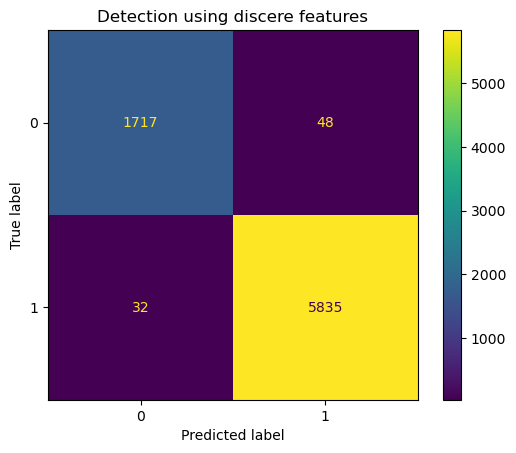

In [25]:
y_pred_svm=svm_classifierfinal.predict(x_test)
cm=confusion_matrix(y_test,y_pred_svm)
cm_display=ConfusionMatrixDisplay(cm)
print(f"\nClassification report")
print(classification_report(y_test, y_pred_svm))
cm_display.plot()
cm_display.ax_.set_title(f'Detection using discere features')
print("Nilai Akurasi untuk SVM ",acc(y_test,y_pred_svm))
print("Nilai Sensitivitas untuk SVM ",rc(y_test,y_pred_svm))
print("Nilai Spesifisitas untuk SVM ",spec(y_test,y_pred_svm))
print("Nilai ROC-AUC untuk SVM ",rocauc(y_test,y_pred_svm))

### Membuat model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54

In [26]:
from sklearn.ensemble import BaggingClassifier

In [27]:
clf=[]
for i in range(54):
    clf.append(BaggingClassifier(estimator=svm_classifierfinal,n_estimators=i+1).fit(x_train, y_train))

### Evaluasi metrik model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54

In [28]:
y_pred=[]
for i in range(54):
    y_pred.append(clf[i].predict(x_test))


Classification report 1-estimator
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1765
           1       0.99      0.99      0.99      5867

    accuracy                           0.99      7632
   macro avg       0.98      0.98      0.98      7632
weighted avg       0.99      0.99      0.99      7632


Classification report 2-estimator
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1765
           1       0.99      0.99      0.99      5867

    accuracy                           0.99      7632
   macro avg       0.98      0.98      0.98      7632
weighted avg       0.99      0.99      0.99      7632


Classification report 3-estimator
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1765
           1       0.99      0.99      0.99      5867

    accuracy                           0.99      7632
   macro avg       0.99

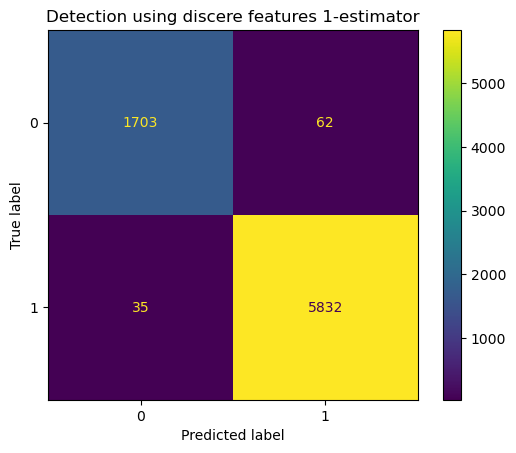

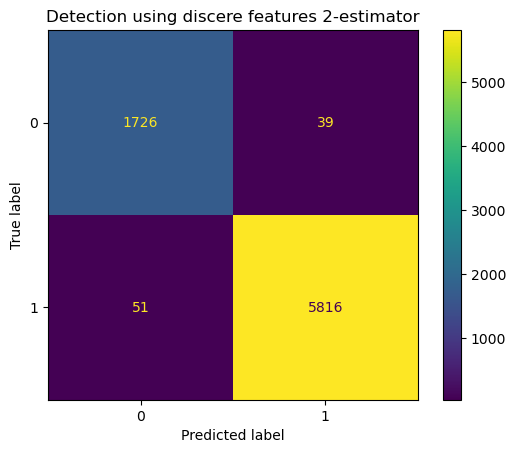

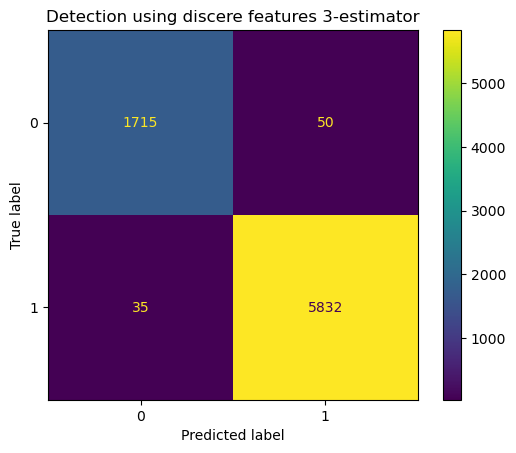

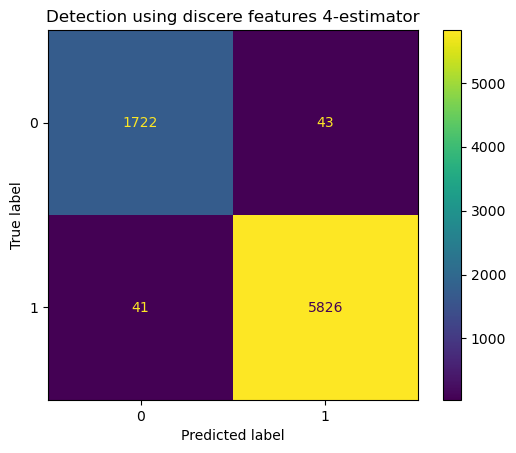

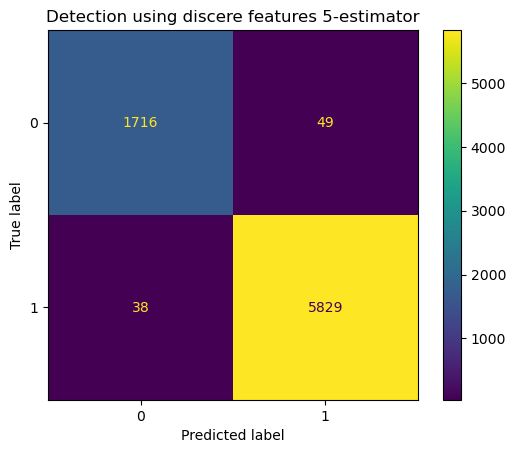

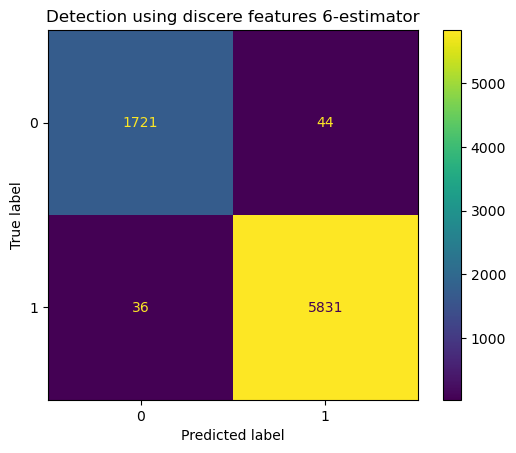

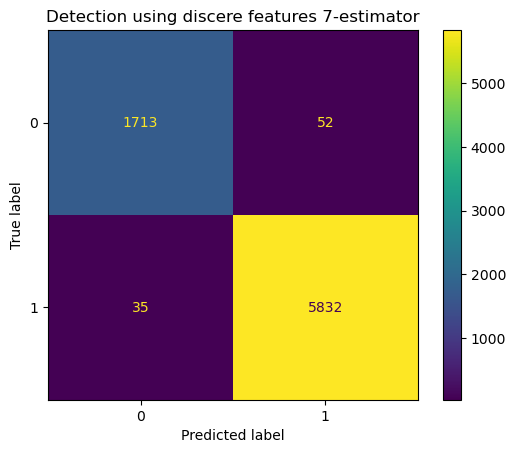

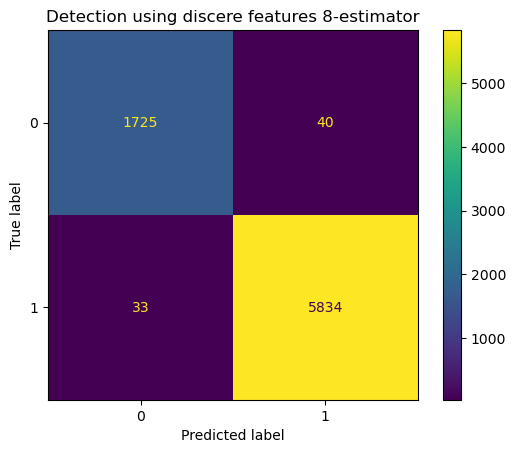

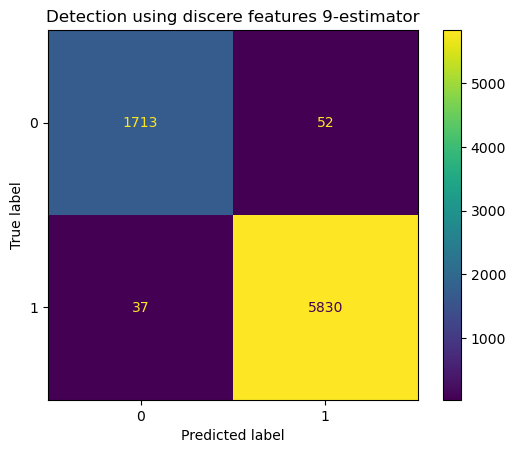

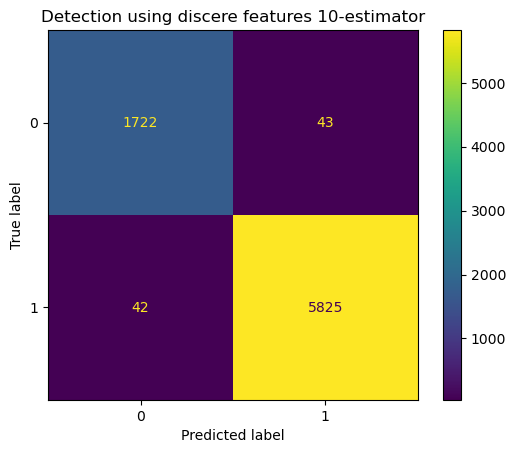

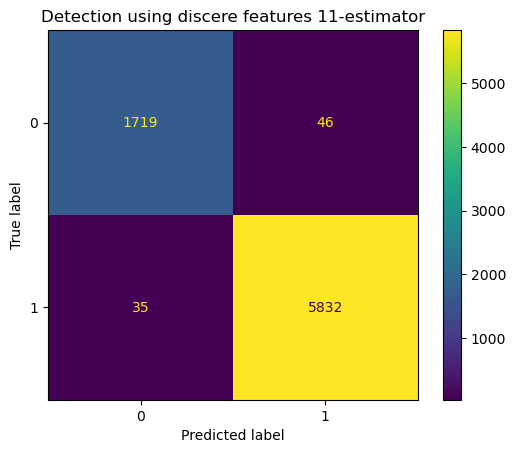

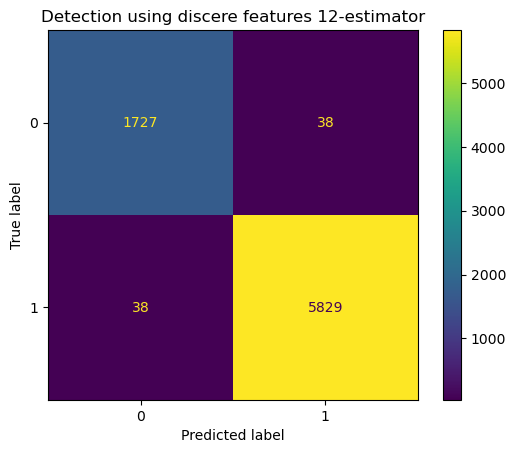

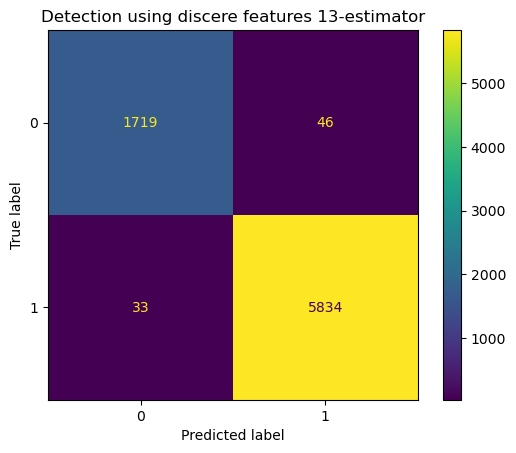

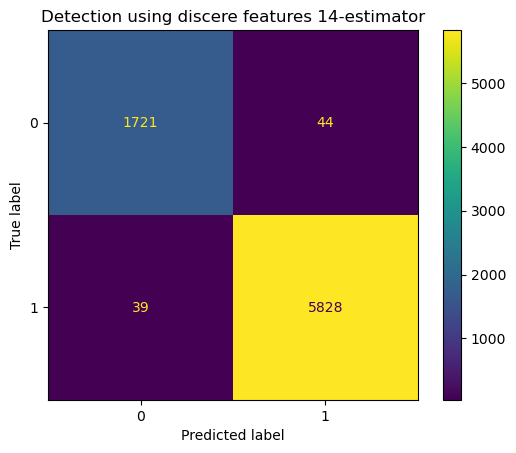

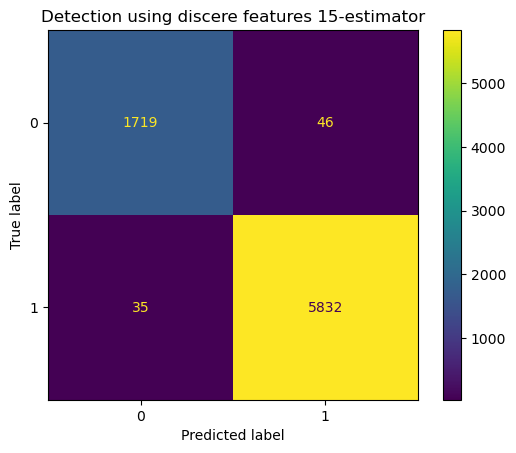

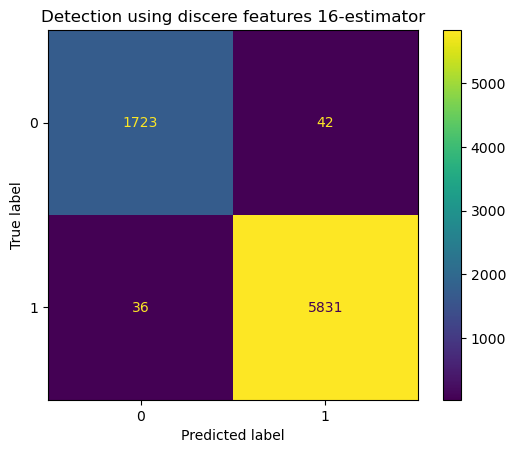

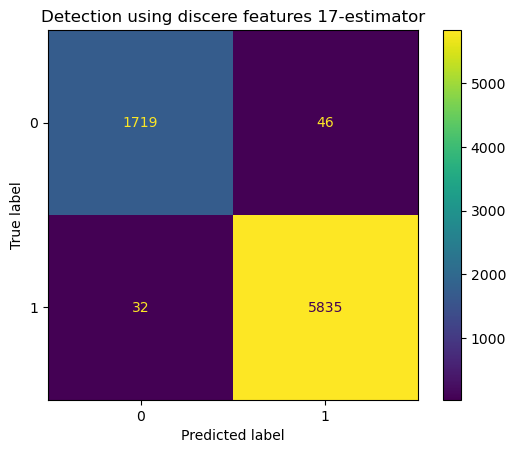

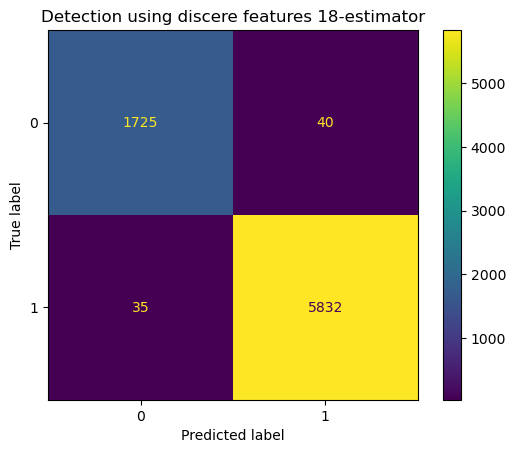

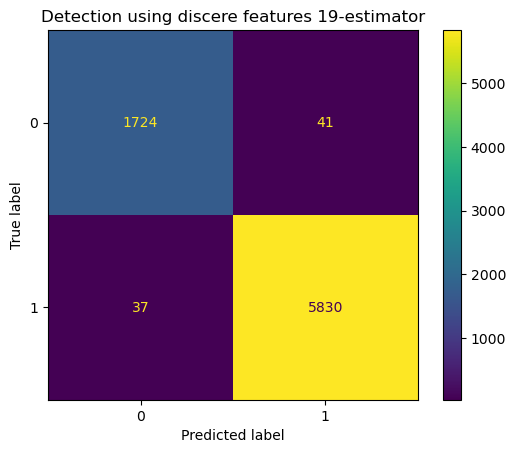

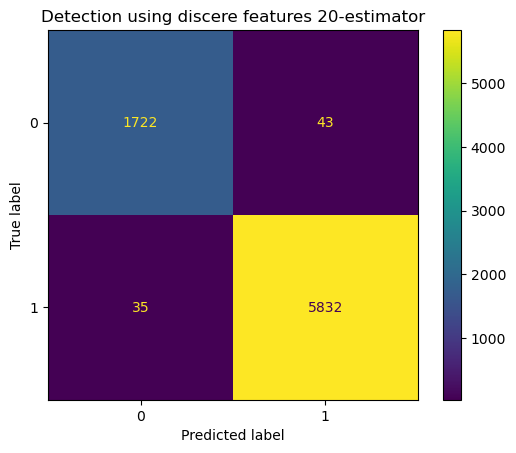

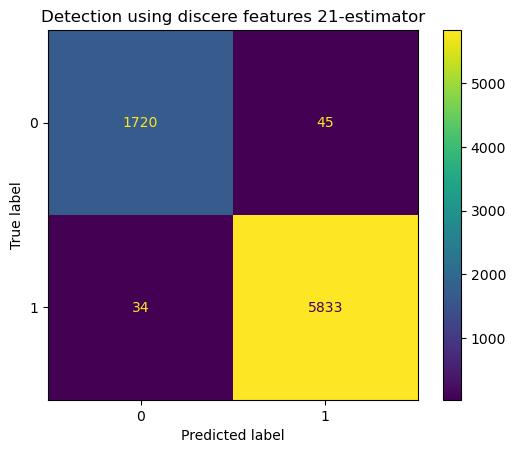

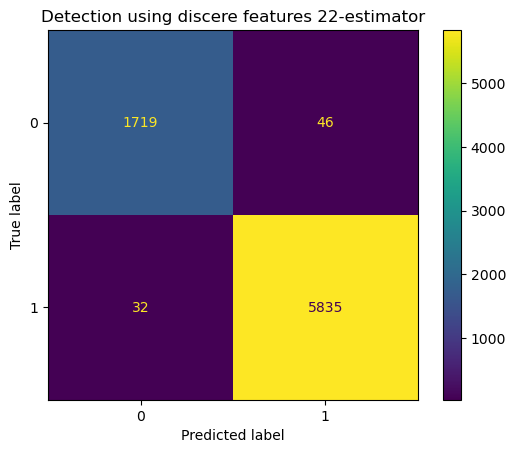

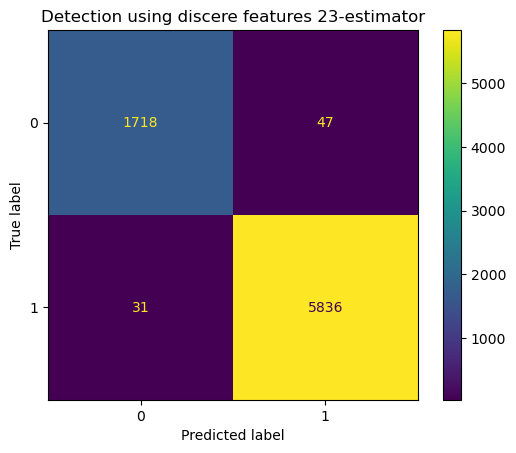

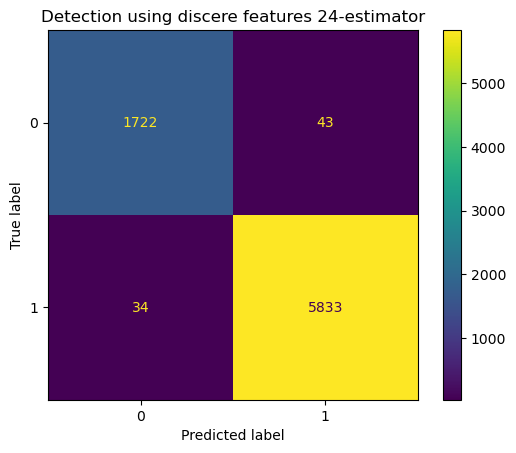

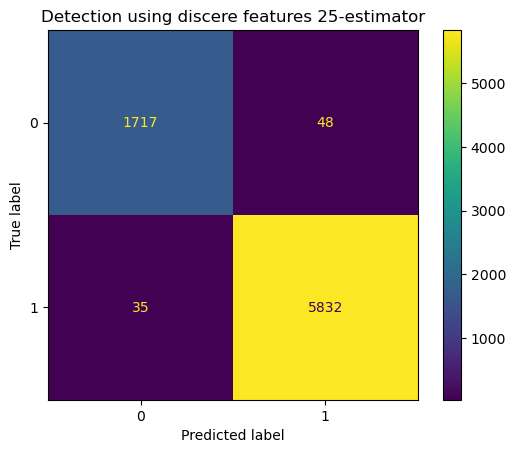

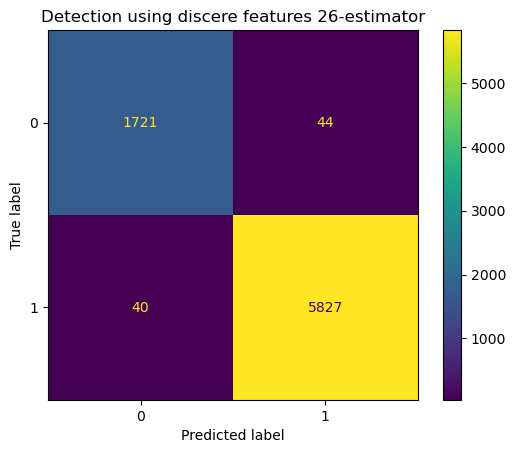

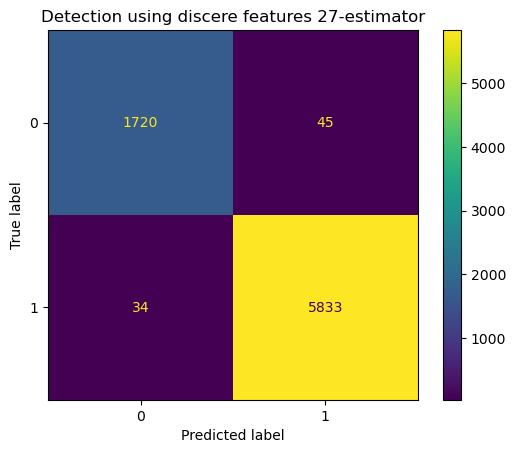

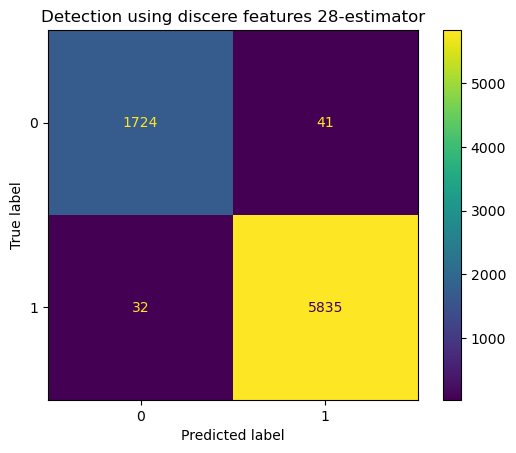

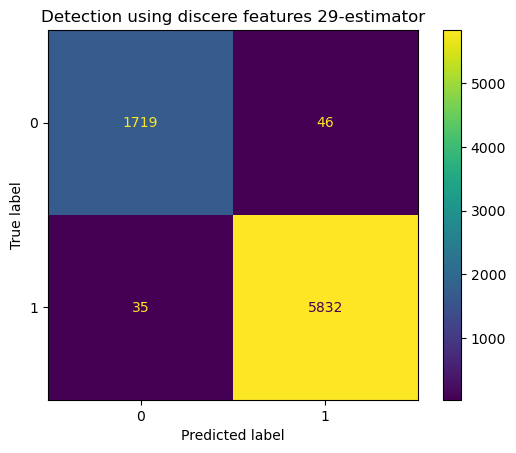

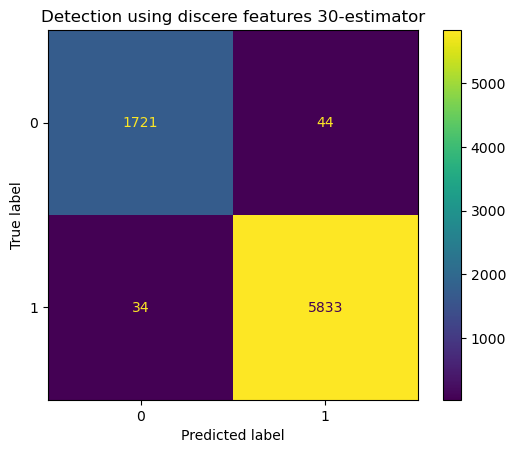

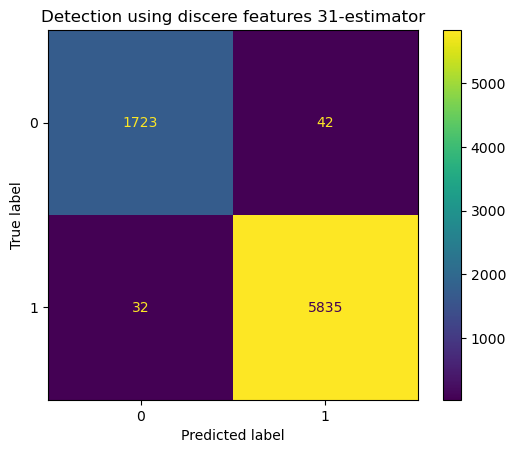

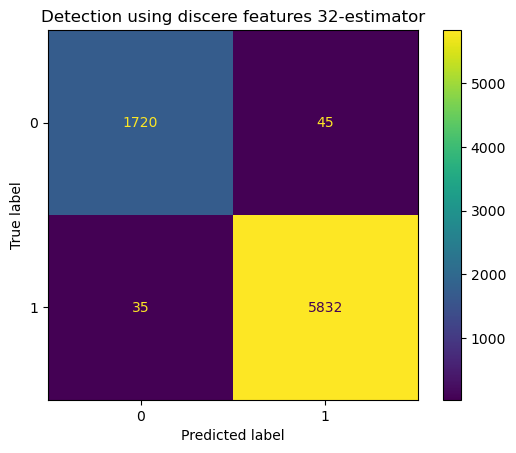

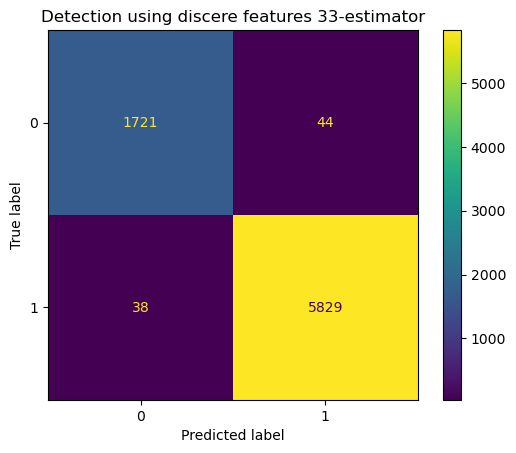

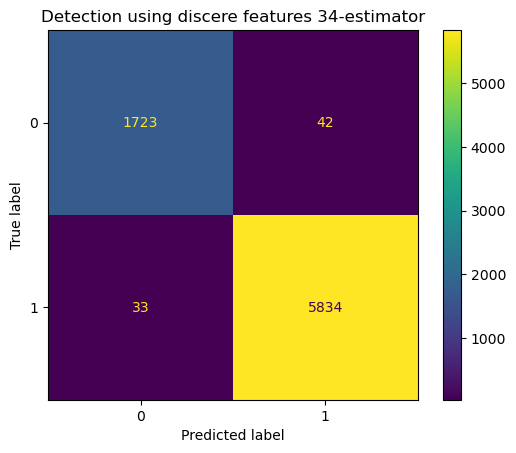

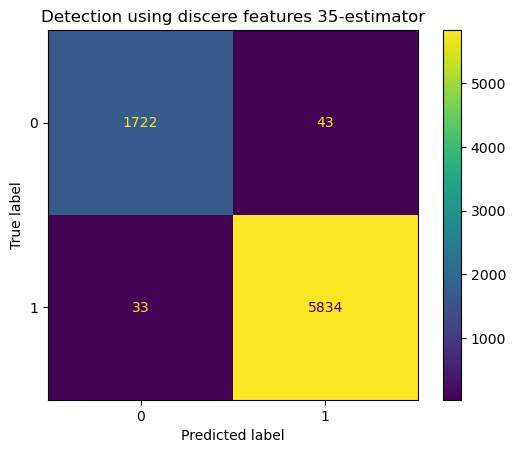

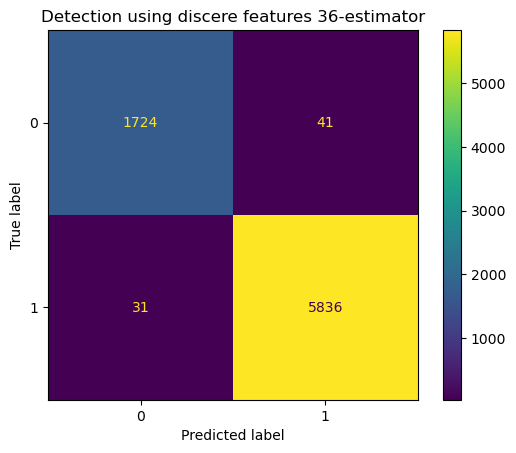

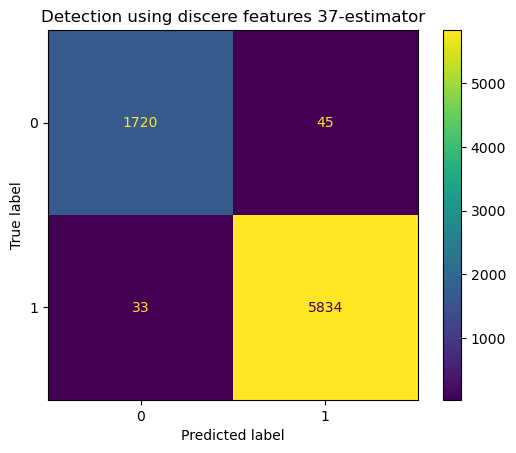

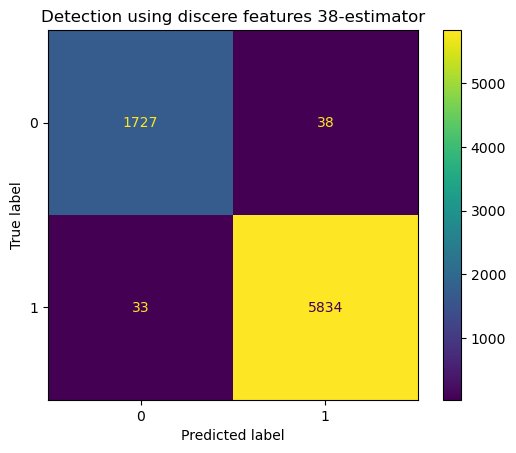

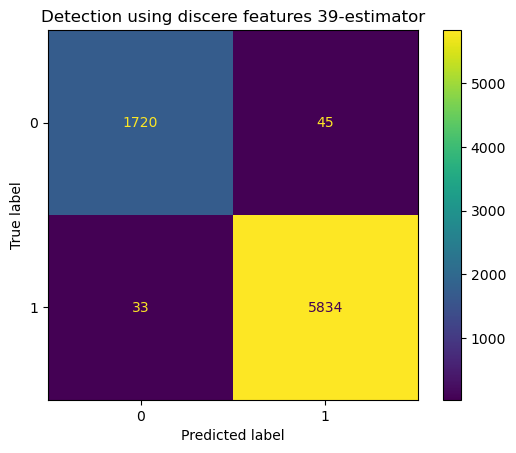

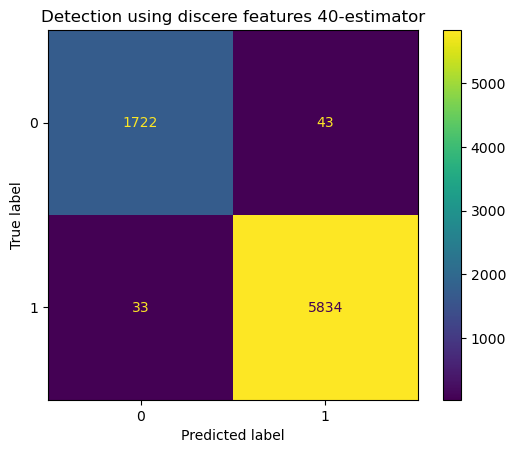

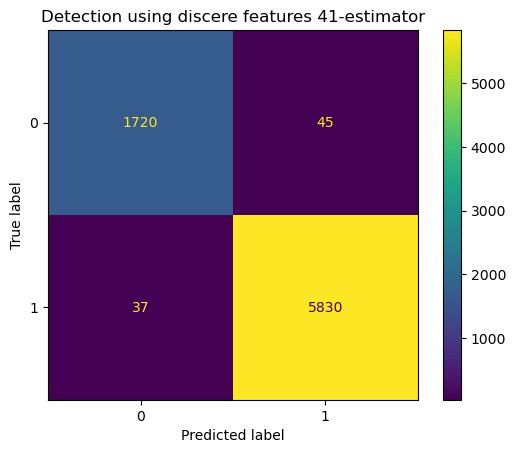

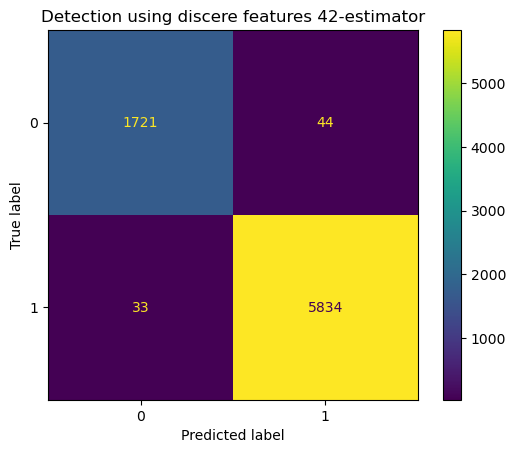

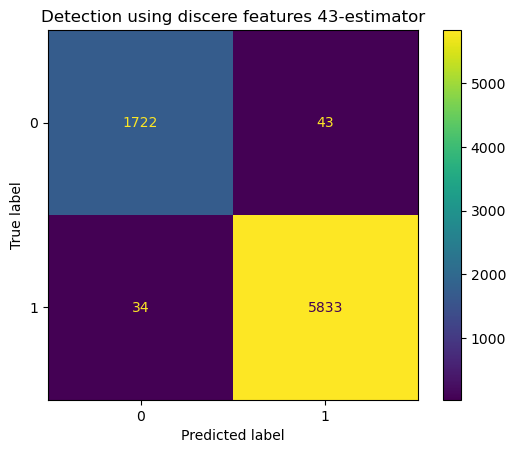

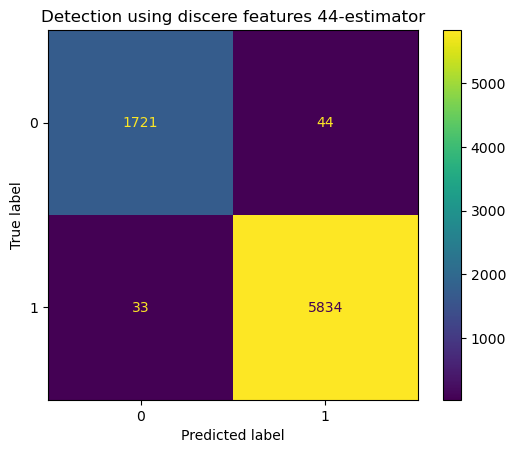

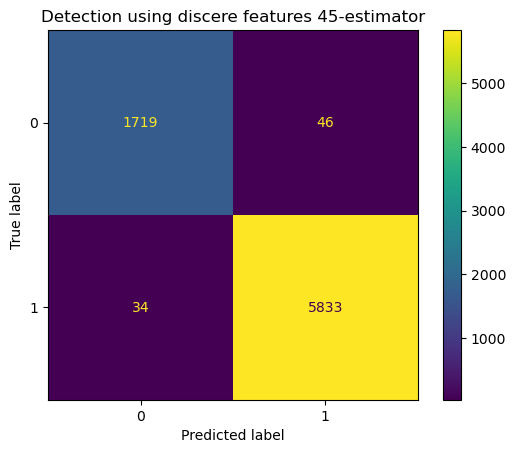

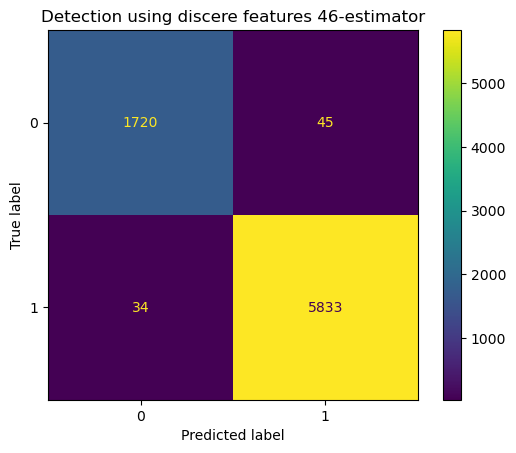

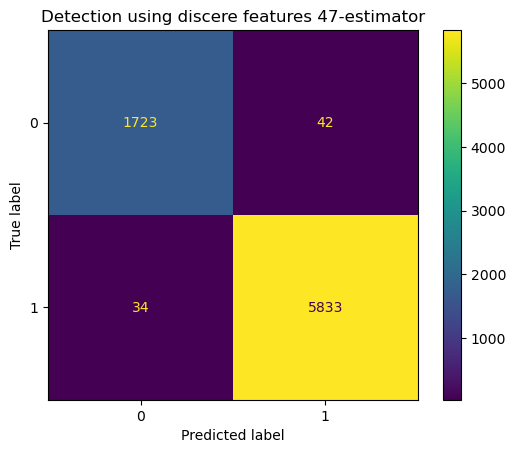

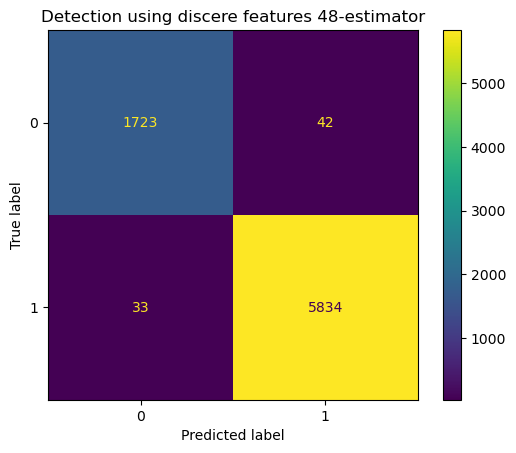

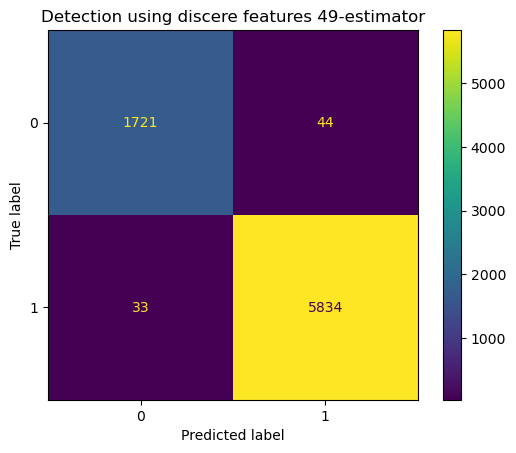

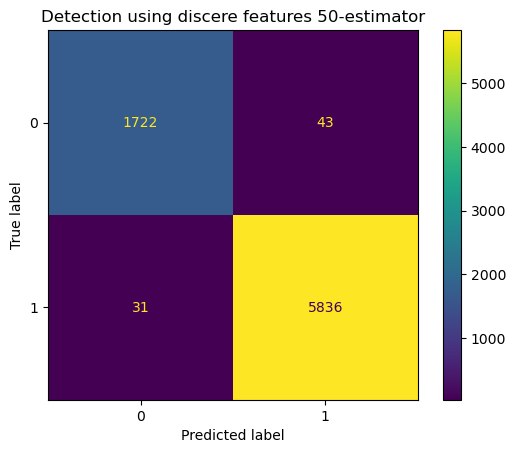

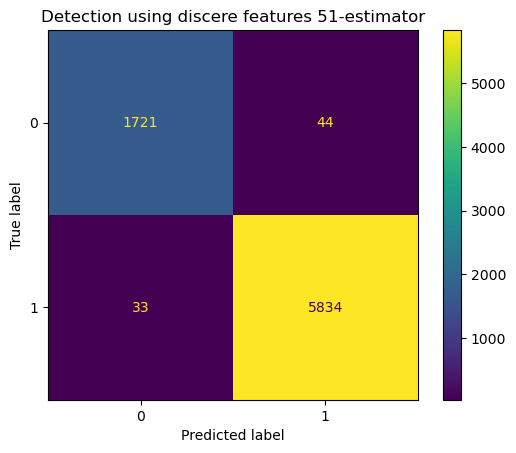

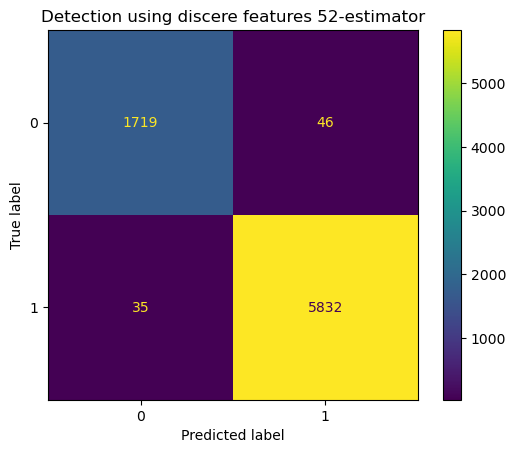

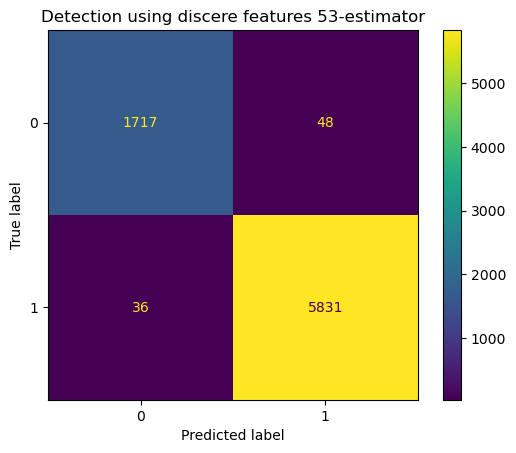

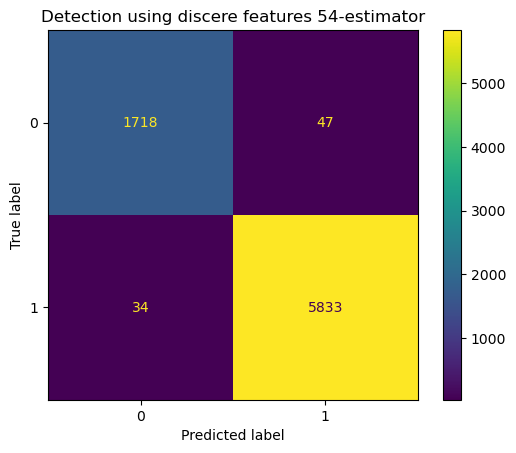

In [29]:
for i in range(54):
    cm=confusion_matrix(y_test,y_pred[i])
    cm_display=ConfusionMatrixDisplay(cm)
    print(f"\nClassification report {i+1}-estimator")
    print(classification_report(y_test, y_pred[i]))
    cm_display.plot()
    cm_display.ax_.set_title(f'Detection using discere features {i+1}-estimator')

### Nilai akurasi model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54 beserta n dengan nilai akurasi yang terbaik

In [74]:
for i in range(54):
    print(f"Nilai Akurasi untuk Ensemble Bagging SVM menggunakan {i+1}-estimator {acc(y_test,y_pred[i])*100:.2f}%")

Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 1-estimator 98.73%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 2-estimator 98.82%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 3-estimator 98.89%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 4-estimator 98.90%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 5-estimator 98.86%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 6-estimator 98.95%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 7-estimator 98.86%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 8-estimator 99.04%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 9-estimator 98.83%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 10-estimator 98.89%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 11-estimator 98.94%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 12-estimator 99.00%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 13-estimator 98.96%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 14-esti

In [31]:
value_acc=[]
for i in range(54):
    value_acc.append(acc(y_test,y_pred[i]))
maks=max(value_acc)
lokasi=value_acc.index(maks)
print(f'Nilai terbesar untuk akurasi adalah {maks*100:.5f}% dengan menggunakan Ensemble Bagging SVM {lokasi+1}-estimator yang {(maks-acc(y_test,y_pred_svm))*100:.5f}% lebih tinggi dari nilai akurasi non-baggingnya' )

Nilai terbesar untuk akurasi adalah 99.06971% dengan menggunakan Ensemble Bagging SVM 38-estimator yang 0.11792% lebih tinggi dari nilai akurasi non-baggingnya


### Nilai Spesifisitas model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54 beserta n dengan nilai spesifisitas yang terbaik

In [75]:
for i in range(54):
    print(f"Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan {i+1}-estimator {spec(y_test,y_pred[i])*100:.2f}%",)

Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 1-estimator 96.49%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 2-estimator 97.79%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 3-estimator 97.17%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 4-estimator 97.56%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 5-estimator 97.22%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 6-estimator 97.51%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 7-estimator 97.05%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 8-estimator 97.73%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 9-estimator 97.05%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 10-estimator 97.56%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 11-estimator 97.39%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 12-estimator 97.85%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 13-estimator 97

In [33]:
value_ps=[]
for i in range(54):
    value_ps.append(spec(y_test,y_pred[i]))
maks=max(value_ps)
lokasi=value_ps.index(maks)
print(f'Nilai terbesar untuk spesifisitas adalah {maks*100:.5f}% dengan menggunakan Ensemble Bagging SVM {lokasi+1}-estimator yang {(maks-spec(y_test,y_pred_svm))*100:.5f}% lebih tinggi dari nilai spesifisitas non-baggingnya' )

Nilai terbesar untuk spesifisitas adalah 97.84703% dengan menggunakan Ensemble Bagging SVM 12-estimator yang 0.56657% lebih tinggi dari nilai spesifisitas non-baggingnya


### Nilai Recall model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54 beserta n dengan nilai Recall yang terbaik

In [76]:
for i in range(54):
    print(f"Nilai Recall untuk Ensemble Bagging SVM menggunakan {i+1}-estimator {rc(y_test,y_pred[i])*100:.2f}%",)

Nilai Recall untuk Ensemble Bagging SVM menggunakan 1-estimator 99.40%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 2-estimator 99.13%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 3-estimator 99.40%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 4-estimator 99.30%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 5-estimator 99.35%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 6-estimator 99.39%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 7-estimator 99.40%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 8-estimator 99.44%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 9-estimator 99.37%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 10-estimator 99.28%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 11-estimator 99.40%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 12-estimator 99.35%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 13-estimator 99.44%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 14-estimator 99.34%
N

In [35]:
value_rc=[]
for i in range(54):
    value_rc.append(rc(y_test,y_pred[i]))
maks=max(value_rc)
lokasi=value_rc.index(maks)
print(f'Nilai terbesar untuk recall adalah {maks*100:.5f}% dengan menggunakan Ensemble Bagging SVM {lokasi+1}-estimator yang {(maks-rc(y_test,y_pred_svm))*100:.5f}% lebih tinggi dari nilai recall non-baggingnya' )

Nilai terbesar untuk recall adalah 99.47162% dengan menggunakan Ensemble Bagging SVM 23-estimator yang 0.01704% lebih tinggi dari nilai recall non-baggingnya


### Nilai ROC-AUC model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54 beserta n dengan nilai ROC-AUC yang terbaik

In [77]:
for i in range(54):
    print(f"Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan {i+1}-estimator {rocauc(y_test,y_pred[i])*100:.2f}%",)

Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 1-estimator 97.95%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 2-estimator 98.46%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 3-estimator 98.29%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 4-estimator 98.43%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 5-estimator 98.29%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 6-estimator 98.45%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 7-estimator 98.23%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 8-estimator 98.59%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 9-estimator 98.21%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 10-estimator 98.42%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 11-estimator 98.40%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 12-estimator 98.60%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 13-estimator 98.42%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 14-esti

In [37]:
value_rocauc=[]
for i in range(54):
    value_rocauc.append(rocauc(y_test,y_pred[i]))
maks=max(value_rocauc)
lokasi=value_rocauc.index(maks)
print(f'Nilai terbesar untuk ROC-AUC adalah {maks*100:.5f}% dengan menggunakan Ensemble Bagging SVM {lokasi+1}-estimator yang {(maks-rocauc(y_test,y_pred_svm))*100:.5f}% lebih tinggi dari nilai ROC-AUC non-baggingnya' )

Nilai terbesar untuk ROC-AUC adalah 98.64228% dengan menggunakan Ensemble Bagging SVM 38-estimator yang 0.27476% lebih tinggi dari nilai ROC-AUC non-baggingnya


### Mencari peningkatan performa

In [38]:
value_concat = []
t_value_concat = []
value_concat.append(value_acc)
value_concat.append(value_ps)
value_concat.append(value_rc)
value_concat.append(value_rocauc)
for i in range(54):
    temp = []
    for data in value_concat:
        temp.append(data[i])
    t_value_concat.append(temp)
print(t_value_concat)

[[0.98729035639413, 0.964872521246459, 0.9940344298619397, 0.9794534755541994], [0.9882075471698113, 0.9779036827195468, 0.9913073120845407, 0.9846054974020437], [0.9888626834381551, 0.9716713881019831, 0.9940344298619397, 0.9828529089819613], [0.9889937106918238, 0.9756373937677054, 0.9930117606954151, 0.9843245772315603], [0.9886006289308176, 0.9722379603399434, 0.9935230952786773, 0.9828805278093103], [0.989517819706499, 0.975070821529745, 0.9938639850008523, 0.9844674032652986], [0.9886006289308176, 0.9705382436260623, 0.9940344298619397, 0.982286336744001], [0.9904350104821803, 0.9773371104815864, 0.9943753195841145, 0.9858562150328506], [0.98833857442348, 0.9705382436260623, 0.9936935401397647, 0.9821158918829136], [0.9888626834381551, 0.9756373937677054, 0.9928413158343276, 0.9842393548010164], [0.9893867924528302, 0.9739376770538244, 0.9940344298619397, 0.983986053457882], [0.990041928721174, 0.9784702549575071, 0.9935230952786773, 0.9859966751180922], [0.9896488469601677, 0.97

In [41]:
value_svm = [acc(y_test,y_pred_svm),spec(y_test,y_pred_svm),rc(y_test,y_pred_svm),rocauc(y_test,y_pred_svm)]
for data in t_value_concat:
    for i in range(4):
        data[i]-=value_svm[i]
for i in range(54):
    print(f'Untuk {i+1}-estimator menghasilkan peningkatan performa {t_value_concat[i][0]} akurasi, {t_value_concat[i][1]} spesifisitas, {t_value_concat[i][2]} sensitivitas, dan {t_value_concat[i][3]} ROC-AUC')

Untuk 1-estimator menghasilkan peningkatan performa -0.0022274633123691157 akurasi, -0.007932011331444722 spesifisitas, -0.0005113345832621352 sensitivitas, dan -0.004221672957353206 ROC-AUC
Untuk 2-estimator menghasilkan peningkatan performa -0.0013102725366878065 akurasi, 0.005099150141643083 spesifisitas, -0.003238452360661226 sensitivitas, dan 0.0009303488904910395 ROC-AUC
Untuk 3-estimator menghasilkan peningkatan performa -0.0006551362683440143 akurasi, -0.001133144475920611 spesifisitas, -0.0005113345832621352 sensitivitas, dan -0.0008222395295913731 ROC-AUC
Untuk 4-estimator menghasilkan peningkatan performa -0.0005241090146752558 akurasi, 0.0028328611898016387 spesifisitas, -0.0015340037497868497 sensitivitas, dan 0.0006494287200076165 ROC-AUC
Untuk 5-estimator menghasilkan peningkatan performa -0.0009171907756815312 akurasi, -0.0005665722379604166 spesifisitas, -0.0010226691665244925 sensitivitas, dan -0.0007946207022424545 ROC-AUC
Untuk 6-estimator menghasilkan peningkatan p

In [73]:
def cekdilist(list,nol):
    for i in list:
        if i<0:
            return False
    return True

bestloc = []
for i in range(54):
    if cekdilist(t_value_concat[i],0)==True:
        print(f'Untuk {i+1}-estimator menghasilkan peningkatan performa yang definit positif yaitu {t_value_concat[i][0]*100:.5f}% akurasi, {t_value_concat[i][1]*100:.5f}% spesifisitas, {t_value_concat[i][2]*100:.5f}% sensitivitas, dan {t_value_concat[i][3]*100:.5f}% ROC-AUC dengan totalnya {t_value_concat[i][0]*100+t_value_concat[i][1]*100+t_value_concat[i][2]*100+t_value_concat[i][3]*100:.5f}%')
        bestloc.append(i)

Untuk 17-estimator menghasilkan peningkatan performa yang definit positif yaitu 0.02621% akurasi, 0.11331% spesifisitas, 0.00000% sensitivitas, dan 0.05666% ROC-AUC dengan totalnya 0.19618%
Untuk 22-estimator menghasilkan peningkatan performa yang definit positif yaitu 0.02621% akurasi, 0.11331% spesifisitas, 0.00000% sensitivitas, dan 0.05666% ROC-AUC dengan totalnya 0.19618%
Untuk 23-estimator menghasilkan peningkatan performa yang definit positif yaitu 0.02621% akurasi, 0.05666% spesifisitas, 0.01704% sensitivitas, dan 0.03685% ROC-AUC dengan totalnya 0.13676%
Untuk 28-estimator menghasilkan peningkatan performa yang definit positif yaitu 0.09172% akurasi, 0.39660% spesifisitas, 0.00000% sensitivitas, dan 0.19830% ROC-AUC dengan totalnya 0.68662%
Untuk 31-estimator menghasilkan peningkatan performa yang definit positif yaitu 0.07862% akurasi, 0.33994% spesifisitas, 0.00000% sensitivitas, dan 0.16997% ROC-AUC dengan totalnya 0.58853%
Untuk 36-estimator menghasilkan peningkatan perfor

### Menyimpan model

In [66]:
import joblib

for i in range(54):
    joblib.dump(clf[i], f'Ensemble Bagging SVM menggunakan {i+1}-estimator.pkl')

### Menyimpan splitted data dan y_prediksi

In [49]:
y_pred

[array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dt

In [54]:
df_ypred = pd.DataFrame(y_pred)
df_ypred = df_ypred.transpose()
df_ypred

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7628,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7629,1,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
7630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df_ypredsvm = pd.DataFrame(y_pred_svm)
df_ypredsvm

,0
0,1
1,1
2,0
3,1
4,1
...,...
7627,0
7628,1
7629,1
7630,0


In [58]:
kolompred = [f'{n}-estimator' for n in range(54)]
kolompred.append('ypredsvm')
print(kolompred)

['0-estimator', '1-estimator', '2-estimator', '3-estimator', '4-estimator', '5-estimator', '6-estimator', '7-estimator', '8-estimator', '9-estimator', '10-estimator', '11-estimator', '12-estimator', '13-estimator', '14-estimator', '15-estimator', '16-estimator', '17-estimator', '18-estimator', '19-estimator', '20-estimator', '21-estimator', '22-estimator', '23-estimator', '24-estimator', '25-estimator', '26-estimator', '27-estimator', '28-estimator', '29-estimator', '30-estimator', '31-estimator', '32-estimator', '33-estimator', '34-estimator', '35-estimator', '36-estimator', '37-estimator', '38-estimator', '39-estimator', '40-estimator', '41-estimator', '42-estimator', '43-estimator', '44-estimator', '45-estimator', '46-estimator', '47-estimator', '48-estimator', '49-estimator', '50-estimator', '51-estimator', '52-estimator', '53-estimator', 'ypredsvm']


In [64]:
df_ypredicted = pd.concat([df_ypred,df_ypredsvm],axis=1)
df_ypredicted.columns=kolompred
df_ypredicted.to_csv('df_ypredicted.csv', index=False)

In [69]:
df_xtrain = pd.DataFrame(x_train)
df_xtrain.to_csv('df_xtrain.csv', index=False)
df_xtest = pd.DataFrame(x_test)
df_xtest.to_csv('df_xtest.csv', index=False)
df_ytrain = pd.DataFrame(y_train)
df_ytrain.to_csv('df_ytrain.csv', index=False)
df_ytest = pd.DataFrame(y_test)
df_ytest.to_csv('df_ytest.csv', index=False)

# Generate kalimat skripsi

In [82]:
print('Pada eksperimen hanya menggunakan model SVM, model tersebut memberikan hasil klasifikasi yang cukup baik dengan akurasi {:.2f}%, sensitivitas {:.2f}%, spesifisitas {:.2f}%, dan nilai ROC-AUC {:.2f}%. Berikut adalah confusion matriks dari model tersebut.'.format(acc(y_test,y_pred_svm)*100,rc(y_test,y_pred_svm)*100,spec(y_test,y_pred_svm)*100,rocauc(y_test,y_pred_svm)*100))

Pada eksperimen hanya menggunakan model SVM, model tersebut memberikan hasil klasifikasi yang cukup baik dengan akurasi 98.95%, sensitivitas 99.45%, spesifisitas 97.28%, dan nilai ROC-AUC 98.37%. Berikut adalah confusion matriks dari model tersebut.


In [84]:
best=[11,22,35,37]
for i in best:
    print("Pada eksperimen menggunakan model Ensemble bagging SVM {}-estimator, model tersebut memberikan hasil klasifikasi dengan performa yang meningkat dibandingkan dengan hanya menggunakan model SVM. Model ini menghasilkan akurasi {:.2f}%, sensitivitas {:.2f}%, spesifisitas {:.2f}%, dan nilai ROC-AUC {:.2f}% dengan peningkatan kuantitatif untuk setiap evaluasi metrik ada pada tabel berikut.".format(i+1,acc(y_test,y_pred[i])*100,rc(y_test,y_pred[i])*100,spec(y_test,y_pred[i])*100,rocauc(y_test,y_pred[i])*100))

Pada eksperimen menggunakan model Ensemble bagging SVM 12-estimator, model tersebut memberikan hasil klasifikasi dengan performa yang meningkat dibandingkan dengan hanya menggunakan model SVM. Model ini menghasilkan akurasi 99.00%, sensitivitas 99.35%, spesifisitas 97.85%, dan nilai ROC-AUC 98.60% dengan peningkatan kuantitatif untuk setiap evaluasi metrik ada pada tabel berikut.
Pada eksperimen menggunakan model Ensemble bagging SVM 23-estimator, model tersebut memberikan hasil klasifikasi dengan performa yang meningkat dibandingkan dengan hanya menggunakan model SVM. Model ini menghasilkan akurasi 98.98%, sensitivitas 99.47%, spesifisitas 97.34%, dan nilai ROC-AUC 98.40% dengan peningkatan kuantitatif untuk setiap evaluasi metrik ada pada tabel berikut.
Pada eksperimen menggunakan model Ensemble bagging SVM 36-estimator, model tersebut memberikan hasil klasifikasi dengan performa yang meningkat dibandingkan dengan hanya menggunakan model SVM. Model ini menghasilkan akurasi 99.06%, se